In [1]:
import pandas as pd
import numpy as np
%matplotlib inline


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
from pmdarima import auto_arima

In [6]:
df = pd.read_csv("..\Data\co2_mm_mlo.csv")

In [7]:
df.head()

,year,month,decimal_date,average,interpolated
0,1958,3,1958.208,315.71,315.71
1,1958,4,1958.292,317.45,317.45
2,1958,5,1958.375,317.50,317.50
3,1958,6,1958.458,NaN,317.10
4,1958,7,1958.542,315.86,315.86


In [8]:
df['date'] = pd.to_datetime({'year': df['year'], 'month': df['month'], 'day': 1})

In [9]:
df.head()

,year,month,decimal_date,average,interpolated,date
0,1958,3,1958.208,315.71,315.71,1958-03-01
1,1958,4,1958.292,317.45,317.45,1958-04-01
2,1958,5,1958.375,317.50,317.50,1958-05-01
3,1958,6,1958.458,NaN,317.10,1958-06-01
4,1958,7,1958.542,315.86,315.86,1958-07-01


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 729 entries, 0 to 728
Data columns (total 6 columns):
year            729 non-null int64
month           729 non-null int64
decimal_date    729 non-null float64
average         722 non-null float64
interpolated    729 non-null float64
date            729 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2)
memory usage: 34.3 KB


In [11]:
df = df.set_index('date')

In [12]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


In [13]:
df.index.freq = 'MS'

In [14]:
df.head()

,year,month,decimal_date,average,interpolated
date,,,,,
1958-03-01,1958,3,1958.208,315.71,315.71
1958-04-01,1958,4,1958.292,317.45,317.45
1958-05-01,1958,5,1958.375,317.50,317.50
1958-06-01,1958,6,1958.458,NaN,317.10
1958-07-01,1958,7,1958.542,315.86,315.86


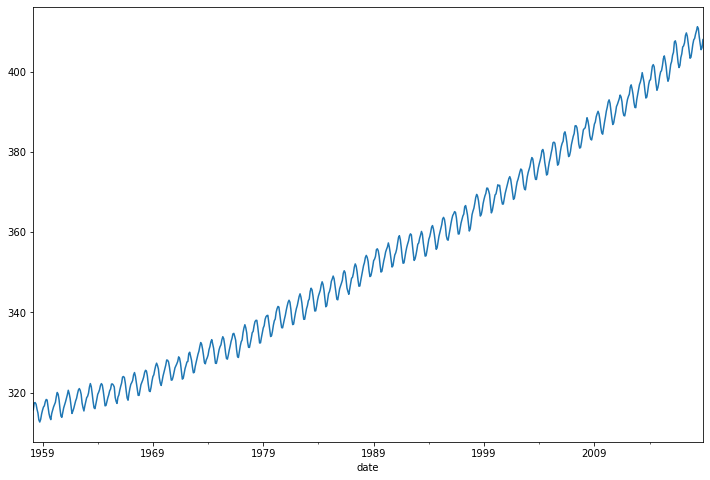

In [16]:
df['interpolated'].plot(figsize=(12, 8));

In [18]:
result = seasonal_decompose(df['interpolated'], model='add')

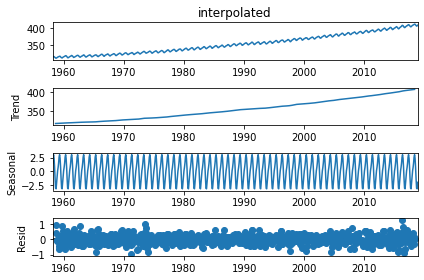

In [21]:
result.plot();

In [22]:
auto_arima(df['interpolated'], seasonal=True, m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(2, 0, [1, 2], 12)   Log Likelihood                -208.357
Date:                                 Sun, 07 Jun 2020   AIC                            430.713
Time:                                         03:06:59   BIC                            462.845
Sample:                                              0   HQIC                           443.112
                                                 - 729                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   7.836e-05      0.000      0.349      0.727      -0.000       0.001
ma.L1         -0.3733      0.034    -10.977      0.000      -0.440      -0.307
ar.S.L12       0.0323      0.016      1.999      0.046       0.001       0.064
ar.S.L24       0.9671      0.016     59.434      0.000       0.935       0.999
ma.S.L12       0.1278      0.022      5.753      0.000       0.084       0.171
ma.S.L24      -0.8658      0.043    -19.990      0.000      -0.951      -0.781
sigma2         0.0951      0.006     17.066      0.000       0.084       0.106
===================================================================================
Ljung-Box (Q):                       50.35   Jarque-Bera (JB):                 4.26
Prob(Q):                              0.13   Prob(JB):                         0.12
Heteroskedasticity (H):               1.12   Skew:                            -0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         3.37
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [23]:
len(df)

729

In [24]:
train = df.iloc[:717]

In [25]:
test=  df.iloc[717:]

In [26]:
model = SARIMAX(train['interpolated'], order=(0, 1, 1), seasonal_order=(2, 0, 1, 12))

In [27]:
results = model.fit()

In [28]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                       interpolated   No. Observations:                  717
Model:             SARIMAX(0, 1, 1)x(2, 0, 1, 12)   Log Likelihood                -205.157
Date:                            Sun, 07 Jun 2020   AIC                            420.313
Time:                                    03:10:46   BIC                            443.182
Sample:                                03-01-1958   HQIC                           429.144
                                     - 11-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.3703      0.034    -10.766      0.000      -0.438      -0.303
ar.S.L12       1.0031      0.038     26.175      0.000       0.928       1.078
ar.S.L24      -0.0035      0.038     -0.090      0.928      -0.078       0.071
ma.S.L12      -0.8670      0.027    -31.727      0.000      -0.921      -0.813
sigma2         0.0960      0.005     20.105      0.000       0.087       0.105
===================================================================================
Ljung-Box (Q):                       51.94   Jarque-Bera (JB):                 3.82
Prob(Q):                              0.10   Prob(JB):                         0.15
Heteroskedasticity (H):               1.13   Skew:                            -0.02
Prob(H) (two-sided):                  0.35   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
start = len(train)

In [30]:
end = len(train) + len(test) -1

In [32]:
predictions = results.predict(start, end, typ='levels').rename('SARIMA Predictions')

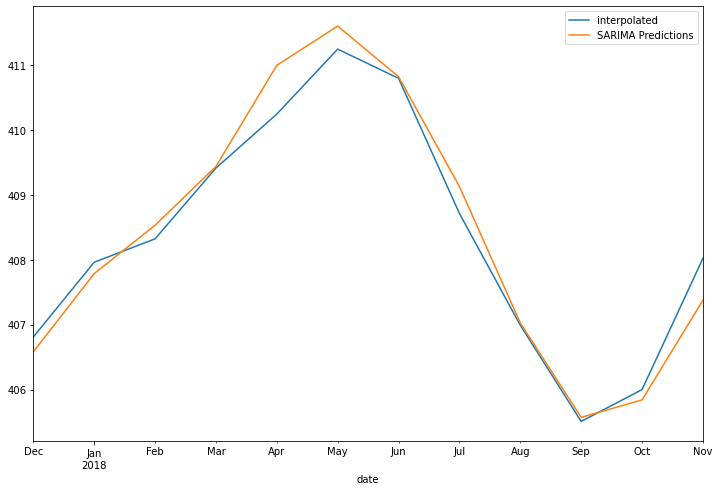

In [34]:
test['interpolated'].plot(legend=True, figsize=(12, 8))
predictions.plot(legend=True);

In [35]:
from statsmodels.tools.eval_measures import rmse

In [36]:
error = rmse(test['interpolated'], predictions)

In [37]:
error

0.3458713098652632

In [38]:
test['interpolated'].mean()

408.3333333333333

In [39]:
model = SARIMAX(df['interpolated'], order=(0, 1, 1), seasonal_order=(1, 0, 1, 12))
results = model.fit()

In [42]:
forecast = results.predict(len(df), len(df)+11, typ='levels').rename("SARIMA FORECAST")

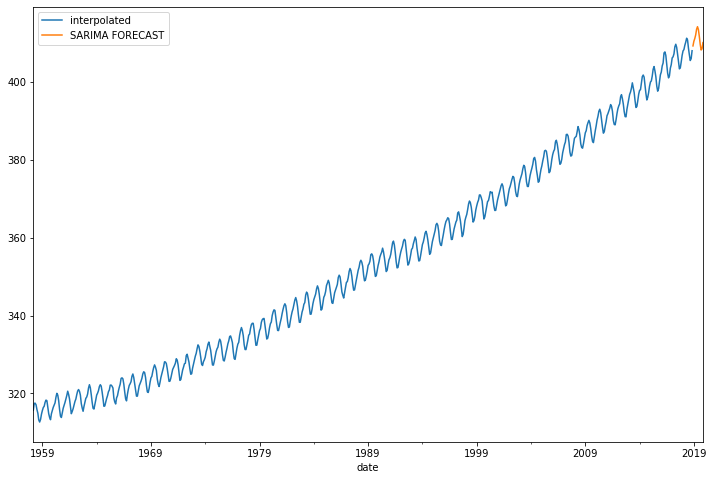

In [43]:
df['interpolated'].plot(legend=True, figsize=(12, 8))
forecast.plot(legend=True);